# Laboratorio 1: Python Básico, Librerias y Modelamiento Básico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Kevin Velasquez Gonzalez
*Métodos computacionales 2025-I*

---

# 1.
Diseñar un programa en el que entrado  un numero `a`  retorne una variable booleana True or false si cumple que es:

- [Números defectivo](https://es.wikipedia.org/wiki/Número_defectivo) : la suma de los divisores propios es menor que el número. 

  La rutina se deberá llamar números_defectivos



- [Números abundantes](https://es.wikipedia.org/wiki/Número_abundante): la suma de los divisores es mayor que el número.

  La rutina se deberá llamar números_abundantes



- [Números semiperfectos](https://es.wikipedia.org/wiki/N%C3%BAmero_semiperfecto) la suma de todos o algunos de los divisores propios es igual al número.

  La rutina se debera llamar numeros_semiperfectos

- [Números perfectos](https://es.wikipedia.org/wiki/N%C3%BAmero_perfecto) la suma de todos sus divisores propios, excepto el mismo numero, es igual al número.

   La rutina se deberá llamar numeros_perfectos


- [Números primos](https://es.wikipedia.org/wiki/N%C3%BAmero_primo) el número es divisible unicamente por sí mismo y por 1.

   La rutina se deberá llamar numeros_primos


**Problema no obligatorio** 

Retornar los 30 primeros números de cada clase

In [5]:
def divisores_propios(n):
    return [i for i in range(1, n) if n % i == 0]

def numeros_defectivos(a):
    return sum(divisores_propios(a)) < a

def numeros_abundantes(a):
    return sum(divisores_propios(a)) > a

def numeros_semiperfectos(a):
    from itertools import combinations
    divisores = divisores_propios(a)
    for i in range(1, len(divisores)+1):
        for combo in combinations(divisores, i):
            if sum(combo) == a:
                return True
    return False

def numeros_perfectos(a):
    return sum(divisores_propios(a)) == a

def numeros_primos(a):
    if a <= 1:
        return False
    for i in range(2, int(a**0.5)+1):
        if a % i == 0:
            return False
    return True

a=int(input('ingresa el numero: '))
print("Defectivo:", numeros_defectivos(a))
print("Abundante:", numeros_abundantes(a))
print("Semiperfecto:", numeros_semiperfectos(a))
print("Perfecto:", numeros_perfectos(a))
print("Primo:", numeros_primos(a))


ingresa el numero:  3


Defectivo: True
Abundante: False
Semiperfecto: False
Perfecto: False
Primo: True


# 2.
Determine si un número `n` entero ingresado por el usuario es un [palíndromo](https://en.wikipedia.org/wiki/Palindromic_number), (Retorne `True` en caso afirmativo y `False` en caso contrario) 

In [11]:
n=str(input("ingrese el numero"))
lista=[]

for i in n:
    lista.append(i)

lista_invertida = lista.copy()
lista_invertida.reverse()

if lista == lista_invertida:
    print(f'{n} es un palíndromo')
else:
    print(f'{n} no es un palíndromo')

ingrese el numero 9999999


9999999 es un palíndromo


# 3.
Una característica útil de las funciones definidas por el usuario es la **recursion**, la capacidad de una función de llamarse a sí misma. Por ejemplo, considere la siguiente definición del factorial $n!$ de un entero positivo $n$:

$$n! = 
\begin{cases} 
1 & \text{si } n = 1, \\ 
n \times (n - 1)! & \text{si } n > 1.
\end{cases}$$

Esta constituye una definición completa del factorial que nos permite calcular el valor de $n!$ para cualquier entero positivo. Podemos emplear esta definición directamente para crear una función en Python para factoriales, así:



```python
def factorial(n):
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)
```
- Los números de Catalan $C_n$ aparecieron previamente en clase. La definición dada allí puede reescribirse como:

$$C_n = 
\begin{cases} 
1 & \text{si } n = 0, \\
\frac{4n - 2}{n + 1} \, C_{n-1} & \text{si } n > 0.
\end{cases}$$

Escriba una función en Python, usando recursión, que calcule $C_n$. Utilice su función para calcular e imprimir $C_{50}$.

- Euclides demostró que el máximo común divisor $g(m, n)$ de dos enteros no negativos $m$ y $n$ satisface:

$$g(m, n) =
\begin{cases} 
m & \text{si } n = 0, \\
g(n, m \bmod n) & \text{si } n > 0.
\end{cases}$$

Escriba una función en Python $g(m, n)$ que emplee recursión para calcular el máximo común divisor de $m$ y $n$ usando esta fórmula. Use su función para calcular e imprimir el máximo común divisor de 108 y 192.


In [14]:
def catalan(n):
    if n == 0:
        return 1
    return ((4 * n - 2) * catalan(n - 1)) // (n + 1)

print(catalan(50))

def mcd(m, n):
    if n == 0:
        return m
    return mcd(n, m % n)

print(mcd(108, 192))

1978261657756160653623774456
12


# 4.
Un problema conocido de mecánica cuántica involucra una partícula de masa $m$ que encuentra un escalón de potencial unidimensional, como se muestra en la figura:

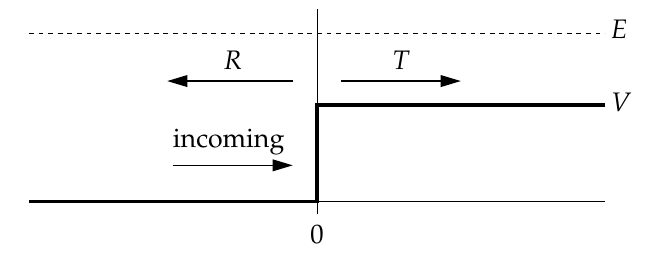


La partícula con energía cinética inicial $E$ y vector de onda $k_1 = \sqrt{2mE}/\hbar$ entra desde la izquierda y encuentra un salto abrupto en la energía potencial de altura $V$ en la posición $x = 0$. Resolviendo la ecuación de Schrödinger, se puede demostrar que cuando $E > V$ la partícula puede:
- Pasar el escalón, en cuyo caso tendrá una energía cinética menor $E - V$ al otro lado y un vector de onda correspondientemente más pequeño $k_2 = \sqrt{2m(E - V)}/\hbar$
- Ser reflejada, manteniendo toda su energía cinética y vector de onda sin cambios, pero moviéndose en dirección opuesta.


Las probabilidades $T$ y $R$ para transmisión y reflexión están dadas por:

$$T = \frac{4k_1k_2}{(k_1 + k_2)^2}, \quad R = \left(\frac{k_1 - k_2}{k_1 + k_2}\right)^2.$$

Consideremos una partícula con masa igual a la del electrón $m = 9.11 \times 10^{-31} \, \text{kg}$ y energía $10 \, \text{eV}$ que encuentra un escalón de potencial de altura $9 \, \text{eV}$. Escriba un programa en Python para calcular e imprimir las probabilidades de transmisión y reflexión usando las fórmulas anteriores.


In [18]:
import numpy as np

hbar = 1.0545718e-34  
eV = 1.60218e-19       
m = 9.11e-31           

E_eV = 10    
V_eV = 9     

E = E_eV * eV
V = V_eV * eV

k1 = np.sqrt(2 * m * E) / hbar
k2 = np.sqrt(2 * m * (E - V)) / hbar

T = (4 * k1 * k2) / (k1 + k2)**2
R = ((k1 - k2) / (k1 + k2))**2

print(f"Probabilidad de transmisión (T): {T:.4f}")
print(f"Probabilidad de reflexión (R): {R:.4f}")
print(f"T + R = {T + R:.4f}")

Probabilidad de transmisión (T): 0.7301
Probabilidad de reflexión (R): 0.2699
T + R = 1.0000


# 5.
La órbita en el espacio de un cuerpo alrededor de otro, como un planeta alrededor del Sol, no necesita ser circular. En general toma la forma de una elipse, con el cuerpo a veces más cerca y a veces más lejos. Si se conocen la distancia $\ell_{1}$ del acercamiento más próximo que hace un planeta al Sol, llamado perihelio, y su velocidad lineal $v_{1}$ en el perihelio, entonces cualquier otra propiedad de la órbita puede calcularse a partir de estos dos datos de la siguiente manera.
La segunda ley de Kepler nos dice que la distancia $\ell_{2}$ y velocidad $v_{2}$ del planeta en su punto más distante, o afelio, satisfacen $\ell_{2}v_{2}=\ell_{1}v_{1}$. Al mismo tiempo, la energía total, cinética más gravitacional, de un planeta con velocidad $v$ y distancia $r$ del Sol está dada por
    $$
    E = \tfrac{1}{2}mv^{2} - G\frac{mM}{r},
    $$
    donde $m$ es la masa del planeta, $M=1.9891\times 10^{30}\,\mathrm{kg}$ es la masa del Sol, y $G=6.6738\times 10^{-11}\,\mathrm{m}^{3}\,\mathrm{kg}^{-1}\,\mathrm{s}^{-2}$ es la constante gravitacional de Newton. Dado que la energía debe conservarse, se llega a que $v_{2}$ es la raíz más pequeña de la ecuación cuadrática
    $$
    v_{2}^{2} - \frac{2GM}{v_{1}\ell_{1}}v_{2} - \left[v_{1}^{2} - \frac{2GM}{\ell_{1}}\right] = 0.
    $$
    Una vez que se tiene $v_{2}$, podemos calcular $\ell_{2}$ usando la relación $\ell_{2}=\ell_{1}v_{1}/v_{2}$.

- Dados los valores de $v_{1}$, $\ell_{1}$, y $\ell_{2}$, otros parámetros de la órbita vienen dados por fórmulas simples que pueden derivarse de las leyes de Kepler y del hecho de que la órbita es una elipse:
$$
    \text{Semieje mayor:}  \quad a = \tfrac{1}{2}(\ell_{1}+\ell_{2}), 
$$
$$
    \text{Semieje menor:}  \quad b = \sqrt{\ell_{1}\ell_{2}}, 
$$
$$
    \text{Periodo orbital:}  \quad T = \frac{2\pi ab}{\ell_{1}v_{1}}, 
$$
$$
    \text{Excentricidad orbital:}  \quad e = \frac{\ell_{2}-\ell_{1}}{\ell_{2}+\ell_{1}}.
$$

Escriba un programa que solicite al usuario ingresar la distancia al Sol y la velocidad en el perihelio, luego calcule e imprima las cantidades $\ell_{2}$, $v_{2}$, $T$, y $e$.

- Pruebe su programa calculando las propiedades de las órbitas de la Tierra (para la cual $\ell_{1}=1.4710\times 10^{11}\,\mathrm{m}$ y $v_{1}=3.0287\times 10^{4}\,\mathrm{m}\,\mathrm{s}^{-1}$) y del cometa Halley ($\ell_{1}=8.7830\times 10^{10}\,\mathrm{m}$ y $v_{1}=5.4529\times 10^{4}\,\mathrm{m}\,\mathrm{s}^{-1}$). Entre otras cosas, debería encontrar que el período orbital de la Tierra es un año y el del cometa Halley es alrededor de 76 años.


In [21]:
import math

# Constantes
G = 6.6738e-11  # Constante de gravitación universal (m^3 kg^-1 s^-2)
M = 1.9891e30   # Masa del Sol (kg)
pi = math.pi

# Entrada de datos
l1 = float(input("Ingrese la distancia al perihelio l1 (en metros): "))
v1 = float(input("Ingrese la velocidad en el perihelio v1 (en m/s): "))

# Cálculo de v2 resolviendo la ecuación cuadrática
# v2^2 - (2GM / (v1*l1)) * v2 - [v1^2 - (2GM / l1)] = 0
A = 1
B = - (2 * G * M) / (v1 * l1)
C = - (v1**2 - (2 * G * M) / l1)

# Fórmula general
discriminante = B**2 - 4*A*C
if discriminante < 0:
    print("No hay solución real para v2.")
else:
    v2 = (-B - math.sqrt(discriminante)) / (2*A)  # Raíz más pequeña físicamente válida

    # Cálculo de l2 usando la conservación del momento angular
    l2 = (l1 * v1) / v2

   
    a = 0.5 * (l1 + l2)
    b = math.sqrt(l1 * l2)

    T = (2 * pi * a * b) / (l1 * v1)

    e = (l2 - l1) / (l2 + l1)

    print("\nResultados:")
    print(f"l2 = {l2:.3e} m")
    print(f"v2 = {v2:.3e} m/s")
    print(f"Semieje mayor a = {a:.3e} m")
    print(f"Semieje menor b = {b:.3e} m")
    print(f"Periodo orbital T = {T:.3e} s ({T/(3600*24*365.25):.2f} años)")
    print(f"Excentricidad orbital e = {e:.3f}")


Ingrese la distancia al perihelio l1 (en metros):  1.471e11
Ingrese la velocidad en el perihelio v1 (en m/s):  3.0287e4



Resultados:
l2 = 1.520e+11 m
v2 = 2.931e+04 m/s
Semieje mayor a = 1.496e+11 m
Semieje menor b = 1.495e+11 m
Periodo orbital T = 3.154e+07 s (1.00 años)
Excentricidad orbital e = 0.016


# 6. 
Un proyectil es lanzado desde una altura inicial $y_0 = 0$ con una velocidad inicial de $4.0\, \text{m/s}$ a $45^\circ$ respecto a la horizontal. Graficar la trayectoria del proyectil en su plano de movimiento (considerando el eje $x$ paralelo a la horizontal y el origen en la posición inicial del proyectil) desde el punto de lanzamiento hasta el punto donde impacta el suelo (asumiendo un terreno plano). La gráfica debe incluir etiquetas en los ejes y un título. Recuerde que las ecuaciones del movimiento parabólico están dadas por

$$
\text{Posición horizontal:} \quad x(t) = v_{0x} t = v_0 \cos\theta \cdot t 
$$
$$
\text{Posición vertical:} \quad y(t) = y_0 + v_{0y} t - \frac{1}{2}gt^2 = y_0 + v_0 \sin\theta \cdot t - \frac{1}{2}gt^2 
$$
$$
\text{Velocidad horizontal:} \quad v_x(t) = v_{0x} =v_0 \cos \theta= \text{constante} 
$$
$$
\text{Velocidad vertical:} \quad v_y(t) = v_{0y} - gt = v_0 \sin\theta - gt
$$

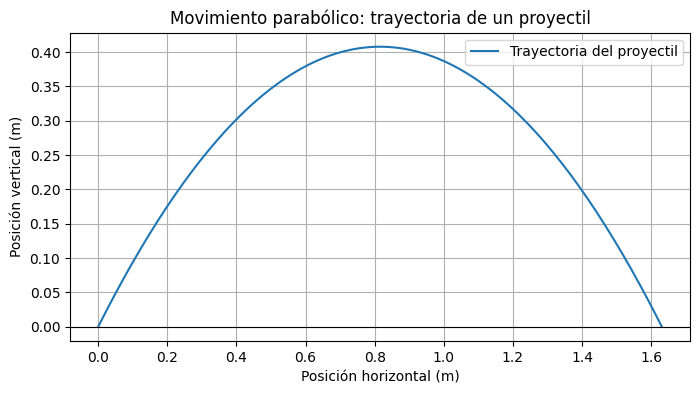

In [17]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 4.0               
grados = 45         
radianes = np.radians(grados) 
g = 9.81               
y0 = 0                 

v0x = v0 * np.cos(radianes)
v0y = v0 * np.sin(radianes)

t_total = 2 * v0y / g

t = np.linspace(0, t_total, 200)

x = v0x * t
y = y0 + v0y * t - 0.5 * g * t**2

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Trayectoria del proyectil')
plt.title('Movimiento parabólico: trayectoria de un proyectil')
plt.xlabel('Posición horizontal (m)')
plt.ylabel('Posición vertical (m)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()

# 7.

Los polinomios de Legendre son de gran importancia en física, especialmente en la solución de la ecuación de Laplace en coordenadas esféricas. Son fundamentales en la expansión en armónicos esféricos, lo que los hace esenciales en problemas de mecánica cuántica y electromagnetismo. Cada polinomio de Legendre $P_n(x)$ es un polinomio de grado $n$. Este puede ser expresado usando la Fórmula de Rodrigues:
     
$$
P_n (x)=\frac{1}{n!\ 2^n} \frac{d^n}{dx^n} (x^2-1)^n, \ \ n \in  \mathbb{Z^{+}}+\{0\}
$$
        
- Utilizando la fórmula de Rodrigues halle $P_0(x)$ y $P_1(x)$.
-  Con la fórmula de recurrencia
$$
            P_{j+1}(x)=\frac{(2j+1)x P_j (x)-jP_{j-1}(x)}{j+1},
$$
elabore un código que permita calcular $P_n(x)$ para $n\geq2$.
- En una misma gráfica muestre $P_n(x)$ para $1\leq n\leq5$.


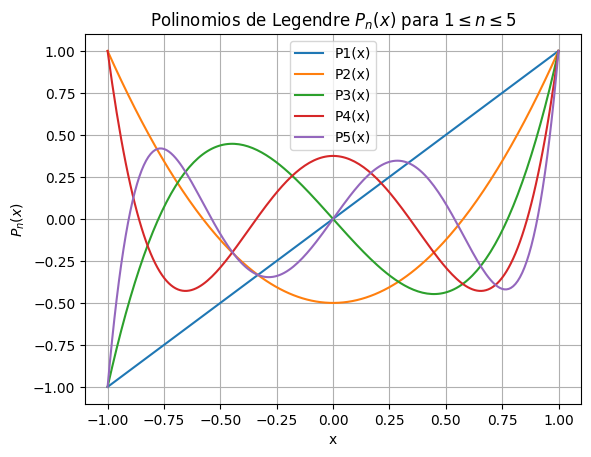

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def P0(x):
    return np.ones_like(x)

def P1(x):
    return x
    
def legendre(n, x):
    if n == 0:
        return P0(x)
    elif n == 1:
        return P1(x)
    else:
        P_nm1 = P0(x)
        P_n = P1(x)
        for j in range(1, n):
            P_np1 = ((2*j + 1)*x*P_n - j*P_nm1) / (j + 1)
            P_nm1, P_n = P_n, P_np1
        return P_n

x = np.linspace(-1, 1, 200)

for n in range(1, 6):
    y = legendre(n, x)
    plt.plot(x, y, label=f'P{n}(x)')

plt.title('Polinomios de Legendre $P_n(x)$ para $1 \\leq n \\leq 5$')
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.legend()
plt.grid(True)
plt.show()
